# **Project Name**    - Topic Modeling BBC News articles



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Chandan Taksande
##### **Team Member 2 -** - Nikhil Arjune


# **Project Summary -**

When we had our last session at at almabetter, next day we both had discussion on how to proceed with this project. And we first did the revision on session's for better understanding and insights. Our second step was to study all the projects topics given on Alma Better Dashboard. We spent three days only to select for project topic. During these three days, each of us carefully observe given dataset for each project and had group discussion once or twice a day. In that group discussion we talk about various possibilities we can obtain from given dataset. We also discuss how can we approach this topic in depth and how should we start working on it. We had lot of debates on which topic we should proceed with. The most interesting discussion we had on was Topic Modeling. Even though it was a complicated but we are relatively familiar with all termilogies given in dataframe. We thought we could learn lot of things from doing this project. As this data had lot of outliers and high skewness. We wanted to learn how to perform NLP on text data try different model on it. And That's why we  selected this project. We selected Topic Modeling because there were a lot of things we could learn while working on it and do lot of exploring too, with more hardcore difficulty. Each of us created a personal rough collab and tried applying and generating results. In the rough collab we had our personal data visualization, wrangling outlier handling , skewness handling and model implementation. Then we came on alma better lounge-table and had a group activity again. We shared our personal rough colab with data visualization, wrangling, text pre-processing, model implementation and discussed in the group with each other. After the discussion and comparing our collab, we studied each others personal colab to find out what are each others mistakes and important points ,which is most logical to be noted. Finally we created a list of our own mistake and important point so that when we start working individually on actual project again, so we won't repeat any mistake or trend already done by other team members. We again had a group discussion session next day on alma better table. We again studied each others colab. And finally created a combine rough colab from the two colab that were created by each of us separately. In that collab we combined data visualization and wrangling data, text preprocessing and model implementaion from each of us. Then we filtered out unnecessary or repeated observation. And tried looking for each and every possible scenario we could come up with. During this project we has lots of questions , queries and ways to apply new ideas. We started finding answers to all queries and questions and also look for ways to how to implement our ideas. We had lot of exploring to do and experimentation to do. That's why we ended up taking more than a two weeks to complete this project. During this period we learn and explore a lot of things that we couldn’t even do it whole ML sessions. It was a wonderful experience. Thank you!

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc**

# ***Let's Begin !***

## 1. Know Your Data

### 1.1 Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim import corpora, models
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2 Dataset Loading

In [ ]:
from pathlib import Path

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set folder path
folder_path = '/content/drive/MyDrive/Alma Better/Capstone Project/Capstone Project 4/bbc'

# Iterate over subfolders
subfolders = [subfolder for subfolder in Path(folder_path).iterdir() if subfolder.is_dir()]
data = []

for subfolder in subfolders:
    # Iterate over text files in subfolder
    for file_path in subfolder.glob('*.txt'):
        # Read the contents of the file
        with open(file_path, 'r', encoding='latin-1') as file:
            content = file.read()
        
        # Append the content and sub-category to the data list
        data.append((content, subfolder.name))
        
# Create a data frame
df = pd.DataFrame(data, columns=['Content', 'Category'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.3 Dataset First View

In [ ]:
df.head()

,Content,Category
0,Redford's vision of Sundance\n\nDespite sporti...,entertainment
1,West End to honour finest shows\n\nThe West En...,entertainment
2,Dirty Den's demise seen by 14m\n\nMore than 14...,entertainment
3,Musical treatment for Capra film\n\nThe classi...,entertainment
4,Bennett play takes theatre prizes\n\nThe Histo...,entertainment


In [ ]:
df.tail()

,Content,Category
2220,Sainsbury's Labour election gift\n\nScience Mi...,politics
2221,MPs demand 'Budget leak' answers\n\nMinisters ...,politics
2222,Howard hits back at mongrel jibe\n\nMichael Ho...,politics
2223,Straw backs ending China embargo\n\nUK Foreign...,politics
2224,Plan to give elderly care control\n\nElderly a...,politics


### 1.4 Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2225, 2)

### 1.5 Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Content   2225 non-null   object
 1   Category  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


#### 1.6 Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

98

In [ ]:
#droping the duplicates
df = df.drop_duplicates()


In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### 1.7 Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Content     0
Category    0
dtype: int64

In [ ]:
# Visualizing the missing values
# sns.set_theme()
# sns.set(rc={"figure.dpi":120, "figure.figsize":(10,8)})
# sns.heatmap(df.isnull(), cbar=False)

### 1.8 Data Set features

#### Content - News articles content
#### Category- Main category of News article

## 2. Data Wrangling

In [ ]:
# Checking articles count per category
df.groupby(['Category'])['Category'].count()

Category
business         503
entertainment    369
politics         403
sport            505
tech             347
Name: Category, dtype: int64

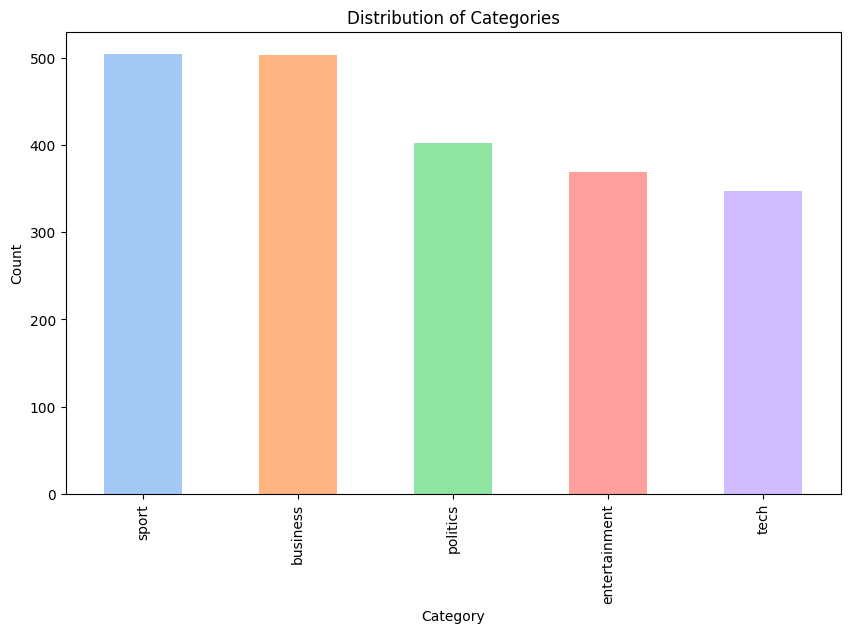

In [ ]:
#Plotting article distribution as per category
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Set the color palette
colors = sns.color_palette('pastel')

# Plot the bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar',color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()


## 3. Data Pre-processing

#### Textual Data Preprocessing 
#### For topic modeling Expand contactions ,lower casing, removing punctuation, removing URLs and words/digits containing digits, removing stopwords and white spaces, tokenization and text normalization (such as lemmatization or stemming) are the pre processing steps that are necessary.

#### Create a complete fuction to apply all text pre-processing steps in one go

In [ ]:
!pip install contractions

import contractions
import re

# Download necessary NLTK resources
nltk.download('punkt')      # Download resource for tokenization
nltk.download('stopwords')  # Download list of stop words
nltk.download('wordnet')    # Download WordNet lexical database for lemmatization
nltk.download('omw-1.4')    # Download WordNet lexical database for lemmatization

def preprocess_text(text):
    # Expand Contractions: Expand contracted words to their full forms
    expanded_text = contractions.fix(text)
    # Example: text = "I can't believe it's Friday!" => expanded_text = "I cannot believe it is Friday!"
    
    # Lowercasing: Convert the text to lowercase
    lowercased_text = expanded_text.lower()
    # Example: expanded_text = "I cannot believe it is Friday!" => lowercased_text = "i cannot believe it is friday!"
    
    # Removing Punctuation: Remove punctuation marks from the text
    no_punctuation_text = re.sub(r'[^\w\s]', '', lowercased_text)
    # Example: lowercased_text = "i cannot believe it is friday!" => no_punctuation_text = "i cannot believe it is friday"
    
    # Removing URLs and Words/Digits containing digits: Remove URLs and words/digits containing digits
    no_url_digits_text = re.sub(r'\b\w*\d\w*\b|\bhttps?\S+\b', '', no_punctuation_text)
    # Example: no_punctuation_text = "i cannot believe it is friday" => no_url_digits_text = "i cannot believe it is friday"
    
    # Removing Stopwords and White Spaces: Remove common words (stopwords) and extra white spaces
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(no_url_digits_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    # Example: no_url_digits_text = "i cannot believe it is friday" => filtered_text = "cannot believe friday"
    
    # Lemmatization: Reduce words to their base or dictionary form
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Example: filtered_text = "running, carrying" => lemmatized_text = "run, carry"
    
    # Return the preprocessed text
    return lemmatized_text

# Applying preprocessing to the DataFrame
df['Preprocessed_Content'] = df['Content'].apply(preprocess_text)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df.head()

,Content,Category,Preprocessed_Content
0,Redford's vision of Sundance\n\nDespite sporti...,entertainment,redford vision sundance despite sporting cordu...
1,West End to honour finest shows\n\nThe West En...,entertainment,west end honour finest show west end honouring...
2,Dirty Den's demise seen by 14m\n\nMore than 14...,entertainment,dirty den demise seen million people saw dirty...
3,Musical treatment for Capra film\n\nThe classi...,entertainment,musical treatment capra film classic film wond...
4,Bennett play takes theatre prizes\n\nThe Histo...,entertainment,bennett play take theatre prize history boy al...


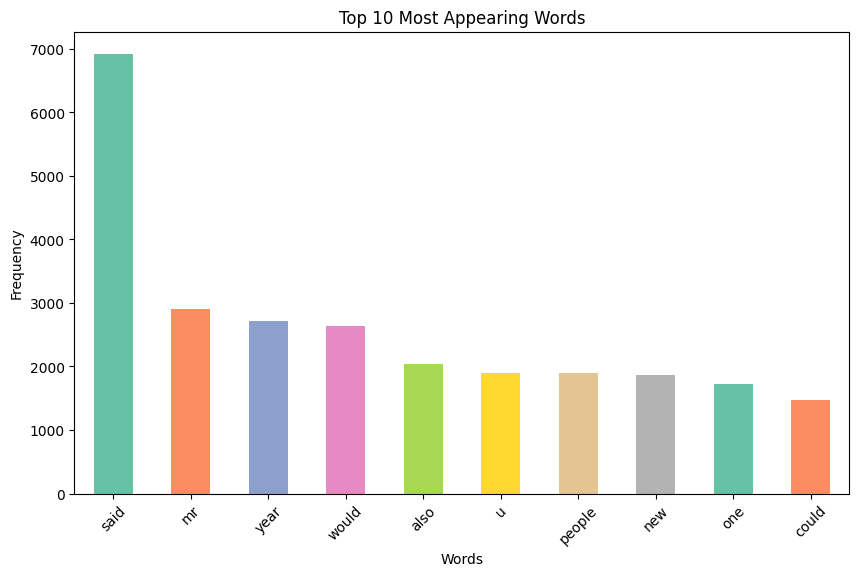

In [ ]:
# plotting graph for top 10 most appeared words in whole corpus 
# Concatenate the preprocessed text from all articles
text = ' '.join(df['Preprocessed_Content'])

# Tokenize the text into individual words
words = text.split()

# Calculate the frequency of each word
word_freq = pd.Series(words).value_counts()

# Select the top 10 most frequent words
top_words = word_freq.head(10)

# Set a colorful color palette
colors = sns.color_palette('Set2')

# Plot the bar graph with custom colors
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color=colors)
plt.title('Top 10 Most Appearing Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#printing top 30 words most appeared in corpus
# Concatenate the preprocessed text from all articles
text = ' '.join(df['Preprocessed_Content'])

# Tokenize the text into individual words
words = text.split()

# Calculate the frequency of each word
word_freq = pd.Series(words).value_counts()

# Select the top 10 most frequent words
top_words = word_freq.head(30)

#print
print(top_words)

said          6928
mr            2899
year          2718
would         2636
also          2037
u             1904
people        1894
new           1869
one           1724
could         1480
game          1434
time          1395
last          1323
first         1227
say           1206
world         1171
government    1163
two           1137
company       1069
film          1045
uk            1025
make          1012
get            918
firm           909
best           891
told           873
like           835
number         826
made           820
take           812
Name: count, dtype: int64


In [ ]:
# Added extra stopwords in variable
extra_stopwords = ['said','mr','also','u','would','could','say']

#created fuction to remove extra stopwords
def remove_extra_stopwords(text):
    # Define additional stopwords
    extra_stopwords  

    # Remove extra stopwords from the text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in extra_stopwords]
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [ ]:
# Apply remove_extra_stopwords on pre-processed text
df['Preprocessed_Content'] = df['Preprocessed_Content'].apply(remove_extra_stopwords)

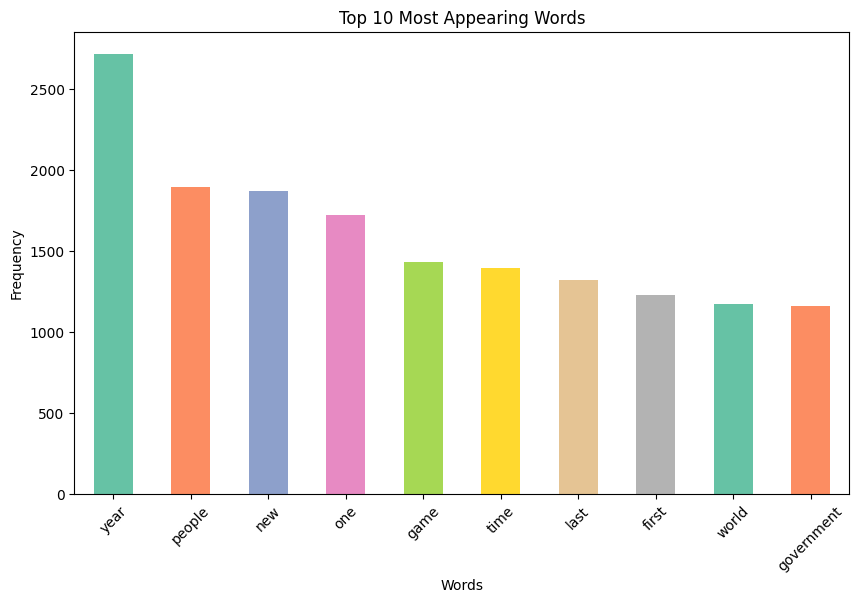

In [ ]:
# Concatenate the preprocessed text from all articles
text = ' '.join(df['Preprocessed_Content'])

# Tokenize the text into individual words
words = text.split()

# Calculate the frequency of each word
word_freq = pd.Series(words).value_counts()

# Select the top 10 most frequent words
top_words = word_freq.head(10)

# Set a colorful color palette
colors = sns.color_palette('Set2')

# Plot the bar graph with custom colors
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color=colors)
plt.title('Top 10 Most Appearing Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

From above word cloud we can say that we have remove extra stopwords

## 4. Text Vectorization



#### In text Vectorization we apply three diffrent methods to process the data,which are as follows

####1. BoW
####2. Count Vectorization
####3. Tf-Idf Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#create dataframe of BoW
# Convert count_vectorized_df to a list of tokenized texts
texts = df['Preprocessed_Content'].apply(lambda x: x.split()).tolist()

# Create a Gensim dictionary
train_id2word = corpora.Dictionary(texts)

# Create a Gensim corpus
train_corpus = [train_id2word.doc2bow(text) for text in texts]

#===========================================================================================================================

# Create an instance of the CountVectorizer
count_vectorizer = CountVectorizer()

# Apply count-based vectorization on the "Preprocessed_Content" column
count_vectorized_data = count_vectorizer.fit_transform(df['Preprocessed_Content'])

# Convert the count vectorized data into a DataFrame
count_vectorized_df = pd.DataFrame(count_vectorized_data.toarray(), columns=count_vectorizer.get_feature_names_out())

print(count_vectorized_df.head())
print('='*50)
#===========================================================================================================================

# Create an instance of the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization on the "Preprocessed_Content" column
tfidf_vectorized_data = tfidf_vectorizer.fit_transform(df['Preprocessed_Content'])

# Convert the TF-IDF vectorized data into a DataFrame
tfidf_vectorized_df = pd.DataFrame(tfidf_vectorized_data.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_vectorized_df.head())

# Concatenate the vectorized data with the original DataFrame
# df_count_vectorized = pd.concat([df, count_vectorized_df], axis=1)
# df_tfidf_vectorized = pd.concat([df, tfidf_vectorized_df], axis=1)



   aa  aaa  aac  aadc  aaliyah  aaliyahs  aaltra  aamir  aara  aarhus  ...  \
0   0    0    0     0        0         0       0      0     0       0  ...   
1   0    0    0     0        0         0       0      0     0       0  ...   
2   0    0    0     0        0         0       0      0     0       0  ...   
3   0    0    0     0        0         0       0      0     0       0  ...   
4   0    0    0     0        0         0       0      0     0       0  ...   

   zoom  zooropa  zornotza  zorro  zubair  zuluaga  zurich  zutons  zvonareva  \
0     0        0         0      0       0        0       0       0          0   
1     0        0         0      0       0        0       0       0          0   
2     0        0         0      0       0        0       0       0          0   
3     0        0         0      0       0        0       0       0          0   
4     0        0         0      0       0        0       0       0          0   

   zvyagintsev  
0            0  
1         

## **5. Model Implementation**

For Topic Modeling we are using LDA as it tries to discover underlying topics in a corpus of text.

### 5.1 Model 1 -LDA Multi core Model for BoW


                                               Model  Coherence Score
0  LdaMulticore<num_terms=27719, num_topics=5, de...         0.409416
1  LdaMulticore<num_terms=27719, num_topics=7, de...         0.523288
2  LdaMulticore<num_terms=27719, num_topics=9, de...         0.554932
3  LdaMulticore<num_terms=27719, num_topics=11, d...         0.541389
4  LdaMulticore<num_terms=27719, num_topics=13, d...         0.519701
5  LdaMulticore<num_terms=27719, num_topics=15, d...         0.533589
6  LdaMulticore<num_terms=27719, num_topics=17, d...         0.516514
7  LdaMulticore<num_terms=27719, num_topics=19, d...         0.537079


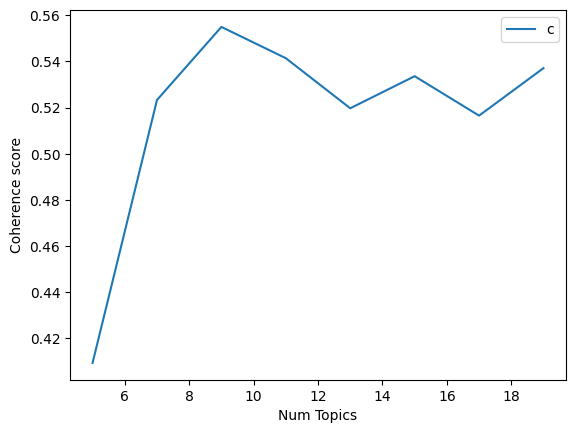

In [ ]:
#Finding coherence score for number of topics varying from 5 to 20
# Which topic will offer best coherence score will be used below to create model 
import gensim
from gensim import corpora
from gensim.models import CoherenceModel


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(
                           corpus=corpus,
                           num_topics=num_topics,
                           id2word=dictionary,
                           chunksize=1000,
                           workers=5, # Num. Processing Cores - 1
                           passes=50,
                           eval_every=1,
                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=train_id2word, 
                                                        corpus=train_corpus, texts=texts, start=5, limit=20, step=2)

bow_score= {'Model': model_list, 'Coherence Score': coherence_values}
bow_score_df= pd.DataFrame(bow_score)
print(bow_score_df)
print("="*50)

import matplotlib.pyplot as plt

%matplotlib inline

# Show graph
limit = 20
start = 5
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### From above coherence score we found that we got highest coherence score for 9 topics. That's why we are inputing 9 topic in below

In [ ]:
#From above result we found out that for 9 topics it generated highest coherence score.
#Thats why we are using 9 topics as argument in lda multicore

from gensim.models import LdaMulticore
from gensim import corpora


# Create an instance of LdaMulticore
num_topics = 9
random_state = 42
chunksize = 1000
passes = 50
workers = 5

lda = LdaMulticore(corpus=train_corpus,
                   id2word=train_id2word,
                   num_topics=num_topics,
                   random_state=random_state,
                   chunksize=chunksize,
                   passes=passes,
                   workers=workers)

# Obtain the document-topic distributions
document_topic_distributions = [lda[doc] for doc in train_corpus]

# Print the top words for each topic
num_top_words = 10
for topic_idx, topic in enumerate(lda.print_topics()):
    top_words = [word for word, _ in lda.show_topic(topic_idx, topn=num_top_words)]
    print(f"Topic #{topic_idx+1}:")
    print(top_words)
    print()

# Assign the dominant topic for each document
dominant_topics = [max(doc, key=lambda x: x[1])[0] for doc in document_topic_distributions]

# Add the dominant topic information to the count_vectorized_df DataFrame
count_vectorized_df['Dominant Topic'] = dominant_topics

Topic #1:
['drug', 'music', 'apple', 'test', 'world', 'one', 'year', 'mac', 'computer', 'new']

Topic #2:
['england', 'wale', 'ireland', 'game', 'rugby', 'six', 'player', 'side', 'scotland', 'nation']

Topic #3:
['game', 'win', 'world', 'time', 'first', 'year', 'player', 'one', 'second', 'play']

Topic #4:
['people', 'game', 'technology', 'mobile', 'phone', 'service', 'new', 'user', 'one', 'use']

Topic #5:
['labour', 'blair', 'party', 'election', 'tory', 'minister', 'brown', 'howard', 'people', 'told']

Topic #6:
['year', 'company', 'market', 'firm', 'sale', 'bank', 'price', 'share', 'growth', 'last']

Topic #7:
['law', 'court', 'lord', 'police', 'case', 'government', 'right', 'people', 'told', 'legal']

Topic #8:
['film', 'best', 'award', 'year', 'show', 'music', 'star', 'one', 'new', 'actor']

Topic #9:
['government', 'tax', 'people', 'year', 'eu', 'country', 'uk', 'minister', 'council', 'plan']



In [ ]:
#creating visulization for above LDA model using pyLDAvis

# Enable notebook display
pyLDAvis.enable_notebook(sort=True)

# Prepare the data for visualization
vis_data = pyLDAvis.gensim_models.prepare(lda, train_corpus, train_id2word)

# Display the visualization
pyLDAvis.display(vis_data)

## Model 2-LDA Model for With Count Vectorizer

In [ ]:
#creating LDA model with count vectorizer

# Define the parameter grid for grid search
grid_params = {'n_components': list(range(5, 20))}

# Create an instance of LDA
lda = LatentDirichletAllocation()

# Perform grid search to find the best LDA model
lda_count_model = GridSearchCV(lda, param_grid=grid_params)
lda_count_model.fit(count_vectorized_df)

# Get the best LDA model
best_lda_count_model = lda_count_model.best_estimator_

#best parameter
best_count_paramaters=lda_count_model.best_params_
count_log_likelihhod_score=lda_count_model.best_score_
count_perplexity=best_lda_count_model.perplexity(count_vectorized_df)

# Print the best parameters and scores
print("Best LDA model's params:", best_count_paramaters)
print("Best log likelihood Score for the LDA model:", count_log_likelihhod_score)
print("LDA model Perplexity on train data:",count_perplexity)

Best LDA model's params: {'n_components': 5}
Best log likelihood Score for the LDA model: -907800.6320079308
LDA model Perplexity on train data: 4053.4538213406518


In [ ]:
# Get the topic-term distributions from the best LDA model
topic_term_dists = best_lda_count_model.components_ / best_lda_count_model.components_.sum(axis=1)[:, np.newaxis]

# Get the document-topic distributions from the best LDA model
doc_topic_dists = best_lda_count_model.transform(count_vectorized_df)

# Calculate the term frequency by summing the count vectorized data
term_frequency = count_vectorized_df.sum(axis=0)

# Get the feature names from the CountVectorizer
feature_names = count_vectorized_df.columns

# Prepare the data for visualization
vis_data_count_vectorizer = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, count_vectorized_df.sum(axis=1), feature_names, term_frequency)

# Display the visualization
pyLDAvis.display(vis_data_count_vectorizer)

## Model -LDA Model for With TF-IDF Vectorizer

In [ ]:
#creating LDA model with TF-IDF vectorizer

# Define the parameter grid for grid search
grid_params = {'n_components': list(range(5, 20))}

# Create an instance of LDA
lda = LatentDirichletAllocation()

# Perform grid search to find the best LDA model
lda_tfidf_model = GridSearchCV(lda, param_grid=grid_params)
lda_tfidf_model.fit(tfidf_vectorized_df)

# Get the best LDA model
best_tfidf_lda_model = lda_tfidf_model.best_estimator_

#best parameter
best_tfidf_paramaters=lda_tfidf_model.best_params_
tfidf_log_likelihhod_score=lda_tfidf_model.best_score_
tfidf_perplexity=best_tfidf_lda_model.perplexity(tfidf_vectorized_df)

# Print the best parameters and scores
print("Best LDA model's params:", best_tfidf_paramaters)
print("Best log likelihood Score for the LDA model:", tfidf_log_likelihhod_score)
print("LDA model Perplexity on train data:",tfidf_perplexity)

Best LDA model's params: {'n_components': 5}
Best log likelihood Score for the LDA model: -52647.09447054107
LDA model Perplexity on train data: 38301.55576010121


In [ ]:
#Plotting TF-IDF LDA model with pyLDAvis

# Get the topic-term distributions from the best LDA model
topic_term_dists = best_tfidf_lda_model.components_ / best_tfidf_lda_model.components_.sum(axis=1)[:, np.newaxis]

# Get the document-topic distributions from the best LDA model
doc_topic_dists = best_tfidf_lda_model.transform(tfidf_vectorized_df)

# Calculate the term frequency by summing the count vectorized data
term_frequency = tfidf_vectorized_df.sum(axis=0)

# Get the feature names from the CountVectorizer
feature_names = tfidf_vectorized_df.columns

# Prepare the data for visualization
vis_data_tfidf_vectorizer = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, tfidf_vectorized_df.sum(axis=1), feature_names, term_frequency)

# Display the visualization
pyLDAvis.display(vis_data_tfidf_vectorizer)


Out of above 3 models we find out that count vectorize text with LDA provided good result where acutal topic and resulted topic were 5 and with good perplexity score(lesser the better). Now we

# **Conclusion**

##### In this project we perform 3 different text vectorization method and applied LDA model on it.

1. BoW with LDA- After applying LDA algorithm with BoW we got highest coherence score for 9 topics. We are off by 4 number of topics in this Model.


2. Count Vectorizer with LDA- After applying LDA algorithm on count vectorize data , we got best perplexity score and log likelihood score for 5 topics. And originally our data has 5 topics. 
##### **Metrics Score-**
##### **Best log likelihood Score for the LDA model: -907800.6320079308**
##### **LDA model Perplexity on train data: 4053.4538213406518**

3. TF-IDF Vectorizer with LDA- After applying LDA algorithm on TF-IDF Vectorize data, we again got best perplexity score and likehood score for 5 topics. ANd our original data also had 5 topics
##### **Metrics Score-**
##### **Best log likelihood Score for the LDA model: -52647.09447054107**
##### **LDA model Perplexity on train data: 38301.55576010121**

Out of above 3 models we find out that LDA with count vectorizer and TF-IDF model guessed topics accurately. But amoung these two model, count vectorize with LDA model perform better with metrics of 
##### **Best log likelihood Score for the LDA model: -907800.6320079308** (Higher the Better)
##### **LDA model Perplexity on train data: 4053.4538213406518** (Lower the better)